### **Judul:**
**Identifikasi Jam Sibuk Penumpang Transjakarta pada Koridor 13 Berdasarkan Data Transaksi Tap-In dan Tap-Out**

---

### **Latar Belakang:**

Koridor 13 Transjakarta (Ciledug – Tendean) merupakan satu-satunya koridor dengan jalur layang penuh yang menghubungkan wilayah padat permukiman di Jakarta Barat dan Selatan menuju pusat kota. Keunikan koridor ini dari segi infrastruktur dan volume penumpang menjadikannya penting untuk dikaji secara spesifik.  

Dengan memanfaatkan data transaksi _tap-in_ dan _tap-out_, analisis terhadap pola penggunaan layanan dapat dilakukan secara objektif dan real-time. Identifikasi jam sibuk menjadi penting untuk mendukung pengambilan keputusan operasional, seperti penyesuaian jadwal, peningkatan frekuensi armada, dan pengaturan beban halte.

---

### **Tujuan Penelitian:**

1. Mengidentifikasi waktu-waktu sibuk (jam puncak) penggunaan layanan Transjakarta pada Koridor 13.
2. Menganalisis perbedaan intensitas perjalanan antara hari kerja dan akhir pekan.
3. Memberikan rekomendasi strategis berbasis data untuk mendukung efisiensi operasional armada di jam sibuk.

---

### **Kesimpulan yang Diharapkan:**

- Diperolehnya rentang waktu yang secara statistik signifikan menunjukkan lonjakan aktivitas penumpang.
- Adanya perbedaan pola penggunaan antara hari kerja dan akhir pekan yang dapat dijadikan dasar pengelolaan jadwal.
- Rekomendasi operasional seperti peningkatan frekuensi bus atau redistribusi armada di waktu tertentu dapat diberikan untuk meningkatkan kualitas layanan Transjakarta di Koridor 13.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tj = pd.read_csv('Transjakarta.csv')
tj

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [4]:
ht = pd.read_csv('halte_transjakarta (1).csv')
ht.dropna(inplace=True)
ht.reset_index(drop=True, inplace=True)
ht

,stopName,lat,lon
0,Pal Putih,-6.184631,106.84402
1,Kemenkes 2,-6.228700,106.83302
2,Gg. Kunir II,-6.133132,106.81435
3,Taman Elok 1,-6.195743,106.93526
4,Sunter Boulevard Barat,-6.149650,106.88900
...,...,...,...
3627,Simpang Bundaran Ikan Harapan Indah Raya 1,-6.181458,106.98134
3628,SDN Cengkareng Barat 05,-6.149878,106.72239
3629,Stasiun Jatinegara Arah Selatan,-6.215541,106.87436
3630,MNC Studios,-6.190376,106.76625


# Data Understanding 

In [5]:
# tipe data
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [6]:
# Menghitung jumlah missing value
tj.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [7]:
# Membuat dataframe jumlah dan presentasi missing values
missing = tj.isna().sum().rename('Jumlah')
missing = pd.DataFrame(missing)
missing['persentase'] = (tj.isna().sum()/len(tj) * 100).rename('persentase')
missing

,Jumlah,persentase
transID,0,0.000000
payCardID,0,0.000000
payCardBank,0,0.000000
payCardName,0,0.000000
payCardSex,0,0.000000
payCardBirthDate,0,0.000000
corridorID,1257,3.316623
corridorName,1930,5.092348
direction,0,0.000000
tapInStops,1213,3.200528


In [8]:
# Melihat data yang mengandung NaN
tj[tj.isna().any(axis=1)]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,...,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,...,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,...,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
37882,YMCL988A7J02QF,180074952289665,emoney,Asmadi Setiawan,F,1971,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B01732P,...,106.86825,11,2023-04-30 08:41:09,B01169P,Jln. Jatinegara Timur IV,-6.222457,106.86816,13.0,2023-04-30 10:07:19,NaN
37885,KUXY021D6I25YN,30169751274025,bni,Prasetya Wasita,M,1986,3B,NaN,1.0,B04610P,...,106.72736,2,2023-04-08 10:46:06,B00192P,BSI Cengkareng,-6.147973,106.72781,3.0,2023-04-08 13:06:42,0.0
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,...,106.88830,5,2023-04-04 14:52:31,NaN,Pramuka LIA,-6.192238,106.86858,9.0,2023-04-04 15:38:58,3500.0


In [9]:
# Menghitung jumalh duplikat
tj.duplicated().sum()

0

In [10]:
# Ubah ke datetime
tj['tapInTime'] = pd.to_datetime(tj['tapInTime'])
tj['tapOutTime'] = pd.to_datetime(tj['tapOutTime'])

# Mengisi Missing Value

In [11]:
# Isi corridorID
tj['corridorID'] = tj['corridorID'].fillna('Unknown')

In [12]:
# Isi corridorName
tj['corridorName'] = tj['corridorName'].fillna('Unknown')

In [13]:
# Isi TapInStop
tj['tapInStops'] = tj['tapInStops'].fillna('Unknown')

In [14]:
# Isi TapOutStops
tj['tapOutStops'] = tj['tapOutStops'].fillna('Unknown')

### **Alasan Pengisian Nilai Kosong dengan `'Unknown'`**

Dalam dataset Transjakarta, ditemukan beberapa nilai kosong (`NaN`) pada kolom `corridorID`, `corridorName`, `tapInStops`, dan `tapOutStops`. Nilai kosong tersebut diisi dengan `'Unknown'` untuk alasan-alasan berikut:

---

#### **1. Menjaga Konsistensi dan Kualitas Data**
- Menghindari error saat pemrosesan data, agregasi, dan visualisasi.
- Menjaga format data tetap konsisten, terutama untuk kolom yang bertipe string.
- Memudahkan filter dan pencarian data yang tidak lengkap.

---

#### **2. Menghindari Kehilangan Informasi Lain yang Masih Berguna**
- Menghapus baris kosong bisa menyebabkan hilangnya data lain yang penting seperti timestamp, deviceID, atau userID.
- Dengan `'Unknown'`, data tetap bisa dianalisis walau sebagian atributnya tidak lengkap.

---

#### **3. Mewakili Kondisi Nyata di Lapangan**
Nilai kosong bisa disebabkan oleh beberapa situasi operasional atau teknis yang memang terjadi dalam sistem transportasi, seperti:

- **Lupa Tap In atau Tap Out**  
  Penumpang mungkin lupa melakukan tap in saat naik bus, atau lupa tap out saat turun. Hal ini membuat sistem tidak mencatat halte asal atau tujuan.

- **Kegagalan Sistem Pembaca Kartu (Card Reader)**  
  Terkadang perangkat tidak berhasil membaca kartu meskipun penumpang sudah men-tap, akibat gangguan teknis seperti kerusakan alat, koneksi server, atau kartu rusak.

- **Perjalanan Gratis atau Khusus**  
  Pada kondisi tertentu (misalnya uji coba rute baru, penumpang prioritas, atau kejadian darurat), sistem bisa mengizinkan penumpang naik tanpa tap seperti biasa.

- **Data Tidak Terintegrasi**  
  Mungkin saja terjadi keterlambatan atau kegagalan dalam sinkronisasi data antar sistem (misalnya antara gate tap in dan tap out), sehingga informasi perjalanan tidak lengkap.

---

#### **4. Meningkatkan Keterbacaan Visualisasi**
Dengan mengganti `NaN` menjadi `'Unknown'`, informasi tersebut tetap tampil dalam grafik atau tabel sebagai kategori yang valid, sehingga analisis distribusi dan pencarian anomali bisa lebih akurat.

---

Kalau kamu butuh, aku juga bisa bantu bikin visualisasi atau statistik jumlah data yang diisi `'Unknown'` per kolom, atau memeriksa apakah ada pola khusus (misalnya banyak terjadi di jam sibuk atau halte tertentu). Mau dibantu lanjut ke situ?

In [15]:
# Menangani kasus jika seseorang tidak tap in & tidak tap out -> isi "Unknown"
tj['tapInStopsName'].fillna("Unknown", inplace=True)
tj['tapOutStopsName'].fillna("Unknown", inplace=True)

# Jika ada tap in tetapi tidak ada tap out, maka tap out = "Unknown"
tj.loc[(tj['tapInStopsName'] != "Unknown") &
                    (tj['tapOutStopsName'] == "Unknown"),
                    'tapOutStopsName'] = "Unknown"

# Jika ada tap out tetapi tidak ada tap in, maka tap in = "Unknown"
tj.loc[(tj['tapOutStopsName'] != "Unknown") &
                    (tj['tapInStopsName'] == "Unknown"),
                    'tapInStopsName'] = "Unknown"

C:\Users\alisyaramadhanifatin\AppData\Local\Temp\ipykernel_17452\3335460096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tj['tapInStopsName'].fillna("Unknown", inplace=True)
C:\Users\alisyaramadhanifatin\AppData\Local\Temp\ipykernel_17452\3335460096.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

### **1. Mengisi Nilai Kosong (`NaN`) dengan "Unknown"**
```python
tj['tapInStopsName'].fillna("Unknown", inplace=True)
tj['tapOutStopsName'].fillna("Unknown", inplace=True)
```
**Alasan:**  
Untuk menjaga konsistensi data dan mencegah error saat filtering atau grouping. Nilai `"Unknown"` digunakan sebagai penanda bahwa data tersebut hilang atau tidak terekam.

---

### **2. Jika Ada Tap In tapi Tidak Ada Tap Out**
```python
tj.loc[(tj['tapInStopsName'] != "Unknown") & 
       (tj['tapOutStopsName'] == "Unknown"),
       'tapOutStopsName'] = "Unknown"
```
**Alasan:**  
Menandakan bahwa penumpang masuk ke sistem tapi tidak melakukan tap out. Bisa disebabkan oleh:
- Lupa tap out.
- Perangkat tap out tidak berfungsi.
- Penumpang keluar lewat jalur non-resmi.

---

### **3. Jika Ada Tap Out tapi Tidak Ada Tap In**
```python
tj.loc[(tj['tapOutStopsName'] != "Unknown") & 
       (tj['tapInStopsName'] == "Unknown"),
       'tapInStopsName'] = "Unknown"
```
**Alasan:**  
Menandakan penumpang keluar dari sistem tapi tidak tercatat masuk. Kemungkinan:
- Lupa tap in.
- Masuk lewat jalur tanpa gate (misalnya saat stasiun sangat ramai).
- Kesalahan sistem saat mencatat tap in.

In [16]:
# Buat dictionary halte dengan koordinat
halte = dict(zip(ht['stopName'], zip(ht['lat'], ht['lon'])))
halte

{'Pal Putih': (-6.184631, 106.84402),
 'Kemenkes 2': (-6.2287, 106.83302),
 'Gg. Kunir II': (-6.133132, 106.81435),
 'Taman Elok 1': (-6.195743, 106.93526),
 'Sunter Boulevard Barat': (-6.14965, 106.889),
 'Benhil 3': (-6.21601, 106.81632),
 'Cervino Village': (-6.224355, 106.85165),
 'SDN Pondok Labu 11': (-6.313269, 106.80221),
 'Imperium': (-6.210363, 106.83059),
 'TPU Bungur': (-6.247208, 106.77889),
 'Pegangsaan Timur': (-6.199263, 106.84205),
 'Tendean': (-6.240213, 106.83102),
 'Slipi Petamburan Arah Selatan': (-6.201948, 106.79998),
 'Pasar Rumput': (-6.207125, 106.84112),
 'Gelanggang Remaja Pasar Minggu': (-6.284615, 106.83787),
 'SMK Darussalam': (-6.319946, 106.74598),
 'JORR': (-6.236104, 106.75488),
 'Apartemen Simprug Teras': (-6.232197, 106.78874),
 'Jembatan Tiga Arah Utara': (-6.133383, 106.79267),
 'Gunung Sahari Mangga Dua Timur': (-6.137032, 106.83254),
 'RS Harapan Kita Arah Utara': (-6.184489, 106.79674),
 'Lippo Mall Kramat Jati': (-6.270835, 106.86741),
 'Tirta

In [17]:
# Mengisi koordinat halte tap in berdasarkan nama halte
tj['tapInStopsLat'] = tj['tapInStopsName'].apply(lambda x: halte[x][0] if x in halte else np.nan)
tj['tapInStopsLon'] = tj['tapInStopsName'].apply(lambda x: halte[x][1] if x in halte else np.nan)

In [18]:
# Mengisi koordinat halte tap out berdasarkan nama halte
tj['tapOutStopsLat'] = tj['tapOutStopsName'].apply(lambda x: halte[x][0] if x in halte else np.nan)
tj['tapOutStopsLon'] = tj['tapOutStopsName'].apply(lambda x: halte[x][1] if x in halte else np.nan)

In [19]:
# Menghitung rata-rata tarif perjalanan (hanya untuk baris yang memiliki tap in & tap out valid dan payAmount > 0)
avg_fare = tj.loc[
    (tj['tapInStopsName'] != "Unknown") &
    (tj['tapOutStopsName'] != "Unknown") &
    (tj['payAmount'] > 0),
    'payAmount'
].mean()

# Menyesuaikan payAmount:
# 1. Jika tapInStopsName atau tapOutStopsName adalah "Unknown", maka payAmount diisi 0
tj.loc[
    (tj['tapInStopsName'] == "Unknown") | (tj['tapOutStopsName'] == "Unknown"),
    'payAmount'
] = 0

# 2. Jika kedua nama halte ada tetapi payAmount kosong atau 0, isi dengan rata-rata tarif
tj.loc[
    (tj['tapInStopsName'] != "Unknown") &
    (tj['tapOutStopsName'] != "Unknown") &
    (tj['payAmount'] == 0),
    'payAmount'
] = avg_fare

In [20]:
# Mengidentifikasi baris di mana pengguna tidak tap out (tapOutStopsName = "Unknown")
tj.loc[tj['tapOutStopsName'] == "Unknown", ['tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']] = 0

C:\Users\alisyaramadhanifatin\AppData\Local\Temp\ipykernel_17452\885521149.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  tj.loc[tj['tapOutStopsName'] == "Unknown", ['tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']] = 0


In [21]:
tj['tapInTime'] = pd.to_datetime(tj['tapInTime'], errors='coerce')
tj['tapOutTime'] = pd.to_datetime(tj['tapOutTime'], errors='coerce')

# Aturan pengisian payAmount tanpa membuat kolom baru
tj.loc[(tj['tapOutTime'] - tj['tapInTime']).dt.total_seconds() / 3600 >= 0, 'payAmount'] = 3500

## 1. **Mengisi Koordinat Halte Berdasarkan Nama Halte**
```python
tj['tapInStopsLat'] = tj['tapInStopsName'].apply(lambda x: halte[x][0] if x in halte else np.nan)
tj['tapInStopsLon'] = tj['tapInStopsName'].apply(lambda x: halte[x][1] if x in halte else np.nan)
```
### Alasan:
- Untuk mendapatkan lokasi geografis halte (lat/lon) agar bisa dianalisis secara spasial.
- Jika nama halte tidak ditemukan di dictionary `halte`, maka diisi `NaN` untuk menghindari kesalahan lokasi palsu.

---

## 2. **Menghitung Rata-rata Tarif Perjalanan Valid**
```python
avg_fare = tj.loc[
    (tj['tapInStopsName'] != "Unknown") &
    (tj['tapOutStopsName'] != "Unknown") &
    (tj['payAmount'] > 0),
    'payAmount'
].mean()
```
### Alasan:
- Digunakan sebagai referensi untuk mengisi tarif yang hilang atau nol secara **proporsional dan masuk akal**.
- Hanya menghitung rata-rata dari perjalanan yang valid agar tidak bias oleh data "Unknown".

---

## 3. **Penyesuaian `payAmount` (Tarif Perjalanan)**
### Kasus 1: Salah satu dari tap in atau tap out "Unknown"
```python
tj.loc[
    (tj['tapInStopsName'] == "Unknown") | (tj['tapOutStopsName'] == "Unknown"),
    'payAmount'
] = 0
```
### Alasan:
- Karena titik keberangkatan atau tujuan tidak diketahui, sistem tidak bisa menghitung tarif → **dianggap tidak valid** (payAmount = 0).

---

### Kasus 2: Tap in & out valid, tapi `payAmount` = 0
```python
tj.loc[
    (tj['tapInStopsName'] != "Unknown") &
    (tj['tapOutStopsName'] != "Unknown") &
    (tj['payAmount'] == 0),
    'payAmount'
] = avg_fare
```
### Alasan:
- Asumsinya adalah sistem gagal mencatat tarif, padahal perjalanan dilakukan.
- Daripada membiarkan nol (yang akan merusak analisis rata-rata), **diisi dengan tarif rata-rata** agar lebih realistis.

In [22]:
# Cek jika ada missing value
tj.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

# Uji Staktistik Deskriptif

In [23]:
# Mengambil yg numerik aja
numerik = tj.select_dtypes(include='number')
numerik

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
0,180062659848800,2008,1.0,-6.184631,106.84402,7,-6.203101,106.85715,12.0,3500.0
1,4885331907664776,1997,0.0,-6.228700,106.83302,13,-6.217152,106.81892,21.0,3500.0
2,4996225095064169,1992,0.0,-6.133132,106.81435,38,-6.133731,106.81475,39.0,3500.0
3,639099174703,1978,0.0,-6.195743,106.93526,23,-6.183068,106.93194,29.0,3500.0
4,570928206772,1982,0.0,-6.149650,106.88900,5,-6.135355,106.81143,15.0,3500.0
...,...,...,...,...,...,...,...,...,...,...
37895,4685818286724028395,2004,1.0,-6.196892,106.82309,2,-6.290967,106.82365,13.0,3500.0
37896,6502902290603767,1974,1.0,-6.290154,106.88116,1,-6.291075,106.88634,2.0,3500.0
37897,213159426675861,1976,1.0,-6.216247,106.81676,12,-6.370321,106.89628,14.0,3500.0
37898,377840859133591,1976,1.0,-6.188656,106.80954,33,-6.188861,106.81135,34.0,3500.0


In [24]:
numerik.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214839,106.841554,13.572480,-5.994270,103.052457,20.467414,3375.883905
std,1.321699e+18,13.051482,0.500006,0.057911,0.060370,12.237623,1.150837,19.759974,14.110523,647.311813
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,0.000000,0.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.245440,106.798440,10.000000,3500.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.213105,106.832370,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.170053,106.882030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,0.000000,107.023660,77.000000,3500.000000


### **Kesimpulan Awal**  
**Identifikasi Jam Sibuk Penumpang Transjakarta pada Koridor 13 Berdasarkan Data Transaksi Tap-In dan Tap-Out**

Berdasarkan data transaksi sebanyak **37.900 baris**, diperoleh gambaran awal mengenai karakteristik penumpang dan pola perjalanan pada Koridor 13 Transjakarta (Ciledug–Tendean). Data mencakup informasi mengenai ID kartu, tahun lahir pengguna, arah perjalanan, lokasi halte (tap-in dan tap-out), urutan halte naik dan turun, serta jumlah pembayaran.

Beberapa poin penting dari statistik deskriptif:
- Mayoritas penumpang membayar tarif yang **seragam sebesar 3.500 rupiah**, sesuai dengan sistem tarif flat Transjakarta.
- Data menunjukkan adanya dua arah perjalanan (`direction`), yang bisa digunakan untuk membedakan arus penumpang dari dan menuju pusat kota.
- Lokasi halte tap-in dan tap-out serta urutan perjalanan (start–end) menunjukkan variasi jalur dan jarak tempuh antarpengguna.
- Informasi usia penumpang juga tersedia, dengan rentang kelahiran dari tahun 1946 hingga 2012, yang menunjukkan variasi kelompok umur pengguna.


# Distribusi Data

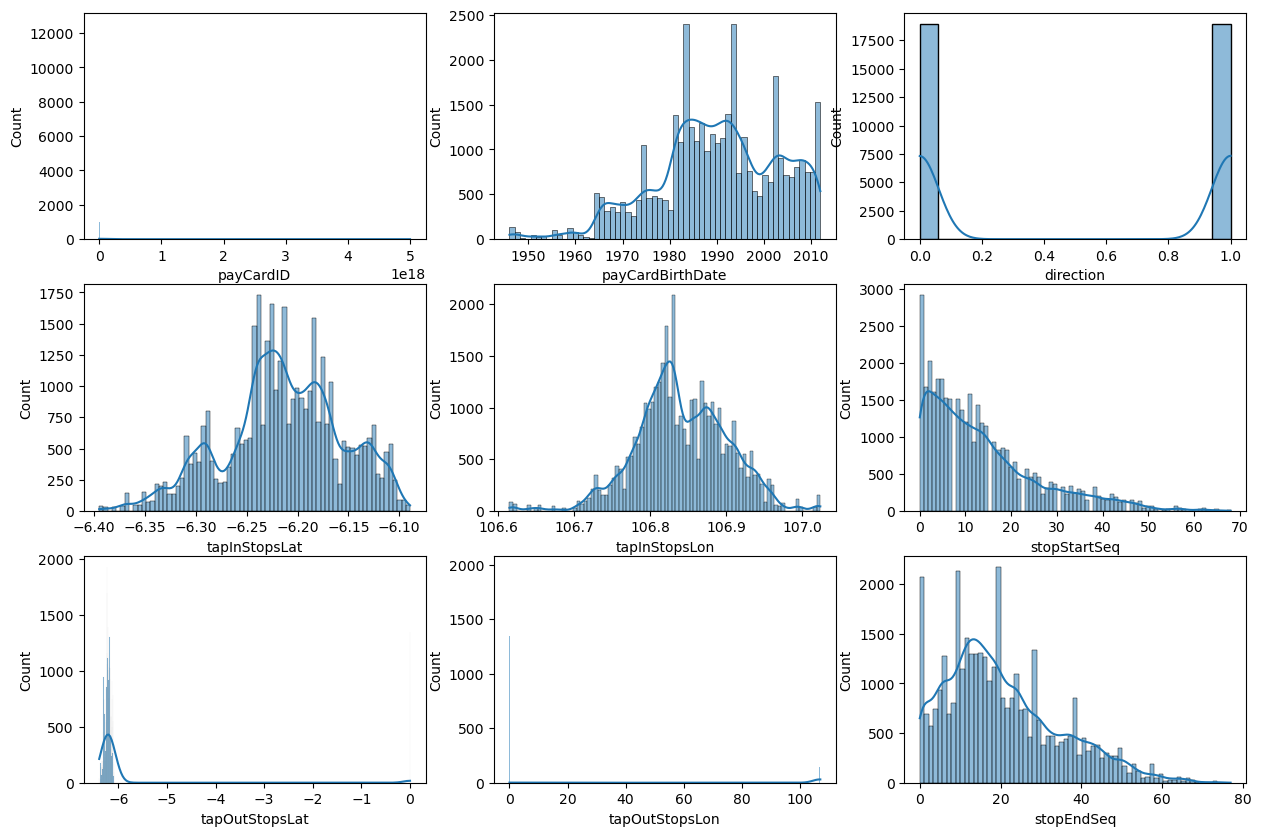

In [25]:
# atur size dari figure
plt.figure(figsize=(15,10)) # kolom

for posisi, nama_kolom in zip(range(1,10), numerik.columns): # posisi 1 - 9
    plt.subplot(3,3,posisi) # jumlah baris, jumlah kolom, posisi
    sns.histplot(tj[nama_kolom], kde=True)

plt.show()

## **Kesimpulan Awal**

Visualisasi histogram terhadap data transaksi penumpang Transjakarta Koridor 13 memberikan gambaran awal tentang pola perjalanan dan karakteristik pengguna. Meskipun variabel waktu belum divisualisasikan secara langsung, histogram ini menyajikan informasi penting yang dapat digunakan untuk mendukung analisis jam sibuk.

---

### **Temuan dari Histogram dan Bentuk Distribusi**

1. **`direction` (Arah Perjalanan)**
   - **Bentuk histogram:** *Distribusi bimodal sempurna*, dengan dua puncak tajam pada 0 dan 1.
   - **Makna:** Menunjukkan distribusi yang **sangat seimbang** antara dua arah perjalanan, artinya baik arah ke Ciledug maupun ke Tendean memiliki volume penumpang yang hampir sama.
   - Hal ini penting untuk menganalisis **jam sibuk secara terpisah per arah perjalanan.**

---

2. **`stopStartSeq` (Halte Naik)**
   - **Bentuk histogram:** *Distribusi right-skewed* (condong ke kanan), dengan puncak di urutan halte awal.
   - **Makna:** Sebagian besar penumpang **memulai perjalanan dari halte awal jalur (dekat Ciledug)**, kemudian semakin sedikit penumpang yang naik di halte-halte selanjutnya.
   - Hal ini konsisten dengan pola **perjalanan komuter ke pusat kota** di pagi hari.

---

3. **`stopEndSeq` (Halte Turun)**
   - **Bentuk histogram:** *Left-skewed* (condong ke kiri), dengan distribusi lebih merata dibanding `stopStartSeq`.
   - **Makna:** Penurunan penumpang lebih **tersebar di sepanjang rute**, menunjukkan bahwa penumpang memiliki tujuan yang bervariasi—umumnya menuju **area perkantoran atau transit.**

---

4. **`tapInStopsLat` dan `tapInStopsLon`**
   - **Bentuk histogram:** *Distribusi multimodal* (beberapa puncak) dengan bentuk yang relatif padat dan seimbang.
   - **Makna:** Lokasi tap-in tersebar merata di sepanjang koridor, dengan beberapa halte yang menjadi titik naik utama. Ini menunjukkan bahwa **akses ke koridor digunakan oleh penumpang dari berbagai lokasi.**

---

5. **`tapOutStopsLat` dan `tapOutStopsLon`**
   - **Bentuk histogram:** Distribusi tidak normal, terdapat **anomali dan lonjakan ekstrem**, kemungkinan karena kesalahan data (nilai koordinat ekstrem atau nol).
   - **Makna:** Perlu dilakukan **pembersihan data** untuk variabel ini sebelum digunakan dalam analisis lanjutan.

---

6. **`payCardBirthDate` (Tahun Lahir Pengguna)**
   - **Bentuk histogram:** *Distribusi multimodal dengan puncak besar di 1980–2010*, dengan sedikit lonjakan di tahun-tahun tertentu.
   - **Makna:** Penumpang didominasi oleh **usia produktif (15–45 tahun)** yang berpotensi melakukan perjalanan rutin pada **jam sibuk kerja dan sekolah**.

---

### **Kesimpulan Sementara**
> Dari bentuk histogram yang telah dianalisis, tampak bahwa mayoritas penumpang Transjakarta Koridor 13 adalah individu usia produktif yang memulai perjalanan dari halte awal rute menuju berbagai titik turun. Distribusi arah perjalanan yang seimbang menunjukkan bahwa jam sibuk terjadi **pada kedua arah** tergantung waktu (pagi dan sore). Untuk mengidentifikasi jam-jam sibuk secara tepat, diperlukan analisis lanjutan menggunakan **data waktu tap-in dan tap-out.**

# Uji Statistika Distribusi Normal

In [26]:
# Kolmogorow Smimov

from scipy.stats import kstest

for nama_kolom in numerik.columns:
    stat, pval = kstest(tj[nama_kolom], 'norm')
    if pval > 0.05:
        print(f'Kolom {nama_kolom} Distribusi Normal (Tolak H0)')
    else:
        print(f'Kolom {nama_kolom} Distribusi Tidak Normal (Terima H0)')

Kolom payCardID Distribusi Tidak Normal (Terima H0)
Kolom payCardBirthDate Distribusi Tidak Normal (Terima H0)
Kolom direction Distribusi Tidak Normal (Terima H0)
Kolom tapInStopsLat Distribusi Tidak Normal (Terima H0)
Kolom tapInStopsLon Distribusi Tidak Normal (Terima H0)
Kolom stopStartSeq Distribusi Tidak Normal (Terima H0)
Kolom tapOutStopsLat Distribusi Tidak Normal (Terima H0)
Kolom tapOutStopsLon Distribusi Tidak Normal (Terima H0)
Kolom stopEndSeq Distribusi Tidak Normal (Terima H0)
Kolom payAmount Distribusi Tidak Normal (Terima H0)


In [27]:
# Liliefors Test

from statsmodels.stats.diagnostic import lilliefors

for kolom in numerik.columns:
    stat, pval = lilliefors(tj[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi payCardID tidak normal (Tolak H0)
Distribusi payCardBirthDate tidak normal (Tolak H0)
Distribusi direction tidak normal (Tolak H0)
Distribusi tapInStopsLat tidak normal (Tolak H0)
Distribusi tapInStopsLon tidak normal (Tolak H0)
Distribusi stopStartSeq tidak normal (Tolak H0)
Distribusi tapOutStopsLat tidak normal (Tolak H0)
Distribusi tapOutStopsLon tidak normal (Tolak H0)
Distribusi stopEndSeq tidak normal (Tolak H0)
Distribusi payAmount tidak normal (Tolak H0)


In [28]:
# D'Agustino Pearson
from scipy.stats import normaltest

for kolom in numerik.columns:
    stat, pval = normaltest(tj[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi payCardID tidak normal (Tolak H0)
Distribusi payCardBirthDate tidak normal (Tolak H0)
Distribusi direction tidak normal (Tolak H0)
Distribusi tapInStopsLat tidak normal (Tolak H0)
Distribusi tapInStopsLon tidak normal (Tolak H0)
Distribusi stopStartSeq tidak normal (Tolak H0)
Distribusi tapOutStopsLat tidak normal (Tolak H0)
Distribusi tapOutStopsLon tidak normal (Tolak H0)
Distribusi stopEndSeq tidak normal (Tolak H0)
Distribusi payAmount tidak normal (Tolak H0)


In [29]:
# Shapiro Wilk
from scipy.stats import shapiro

for kolom in numerik.columns:
    stat, pval = shapiro(tj[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi payCardID tidak normal (Tolak H0)
Distribusi payCardBirthDate tidak normal (Tolak H0)
Distribusi direction tidak normal (Tolak H0)
Distribusi tapInStopsLat tidak normal (Tolak H0)
Distribusi tapInStopsLon tidak normal (Tolak H0)
Distribusi stopStartSeq tidak normal (Tolak H0)
Distribusi tapOutStopsLat tidak normal (Tolak H0)
Distribusi tapOutStopsLon tidak normal (Tolak H0)
Distribusi stopEndSeq tidak normal (Tolak H0)
Distribusi payAmount tidak normal (Tolak H0)


c:\Users\alisyaramadhanifatin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37900.
  res = hypotest_fun_out(*samples, **kwds)


# Boxplot 

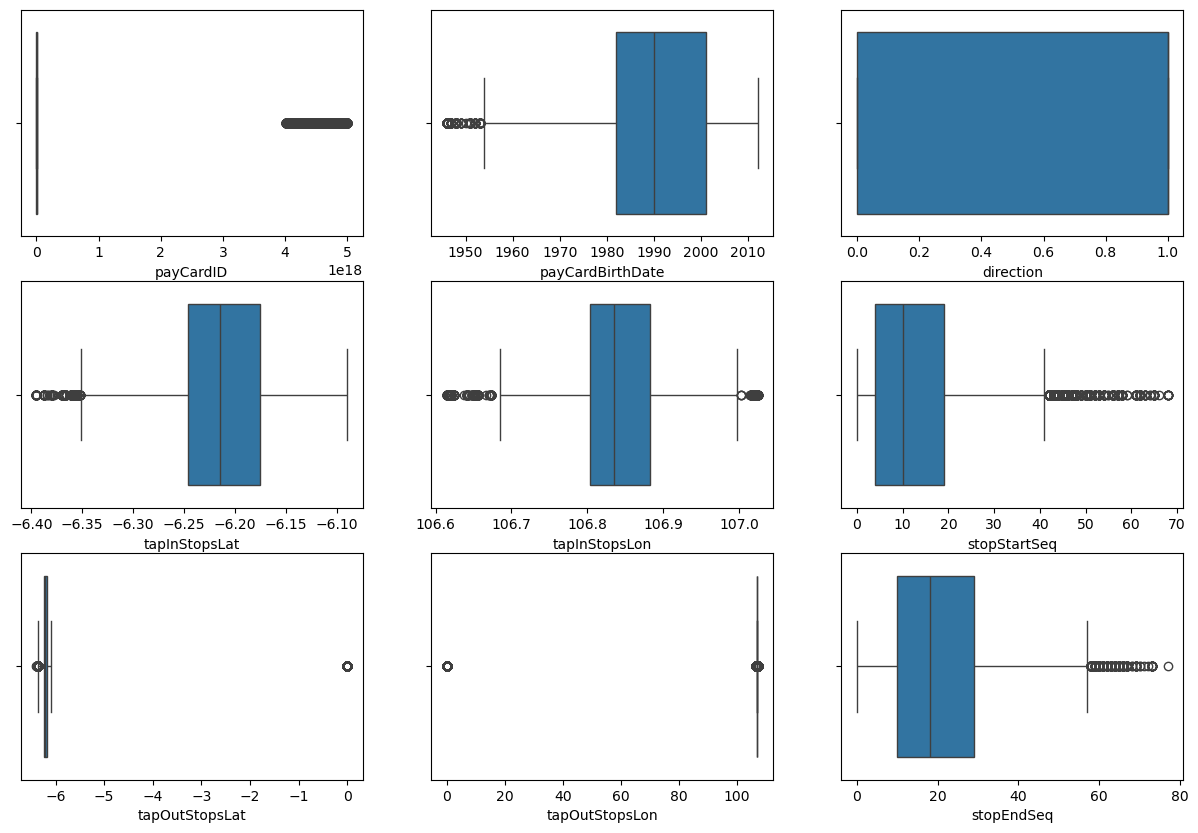

In [30]:
# atur size dari figure
plt.figure(figsize=(15,10)) # kolom

for posisi, nama_kolom in zip(range(1,10), numerik.columns): # posisi 1 - 9
    plt.subplot(3,3,posisi) # jumlah baris, jumlah kolom, posisi
    sns.boxplot(x= tj[nama_kolom])

plt.show()

**kesimpulan awal** berdasarkan **visualisasi boxplot** dari data Transjakarta Koridor 13. Penjelasan ini melengkapi analisis sebelumnya dengan menyoroti **distribusi, persebaran, dan pencilan (outlier)** untuk setiap variabel.

---

## **Kesimpulan Awal dari Boxplot (Statistik Deskriptif Visual)**

### 1. **`payCardID`**
- **Bentuk boxplot:** Hampir semua data berada di dua kelompok ekstrem (terlihat seperti dua klaster besar).
- **Makna:** Terdapat keragaman besar pada ID kartu, tetapi ini **tidak relevan langsung untuk analisis jam sibuk**. ID hanya sebagai identifikasi unik penumpang.

---

### 2. **`payCardBirthDate`**
- **Bentuk boxplot:** Distribusi cukup simetris dengan beberapa **outlier di bawah tahun 1960**.
- **Makna:** Mayoritas pengguna berada dalam rentang usia produktif, mendukung analisis bahwa **jam sibuk kemungkinan berkaitan dengan aktivitas kerja dan sekolah**.

---

### 3. **`direction`**
- **Bentuk boxplot:** Nilai hanya 0 dan 1, tanpa pencilan.
- **Makna:** Kedua arah perjalanan (misalnya Tendean ke Ciledug dan sebaliknya) **terdistribusi seimbang**, mendukung perlunya pemisahan jam sibuk per arah.

---

### 4. **`tapInStopsLat` & `tapInStopsLon`**
- **Bentuk boxplot:** Distribusi normal dengan beberapa **pencilan (outlier)**.
- **Makna:** Lokasi halte tap-in tersebar luas, dengan beberapa **titik tertentu lebih sering digunakan** (kemungkinan halte-halte besar atau titik masuk utama seperti Ciledug).

---

### 5. **`tapOutStopsLat` & `tapOutStopsLon`**
- **Bentuk boxplot:** Terlihat banyak **outlier ekstrem**, bahkan di luar rentang logis untuk koordinat.
- **Makna:** Ada **anomali atau data salah input** (misalnya nilai nol atau koordinat salah), sehingga perlu dilakukan **pembersihan data (data cleaning)** sebelum digunakan untuk analisis jam sibuk.

---

### 6. **`stopStartSeq`**
- **Bentuk boxplot:** Right-skewed dengan banyak pencilan di halte-halte akhir.
- **Makna:** Sebagian besar penumpang **naik di halte awal (dekat Ciledug)**, menunjukkan **pola keberangkatan pagi** yang padat di sisi luar kota menuju pusat.

---

### 7. **`stopEndSeq`**
- **Bentuk boxplot:** Sebaran lebih lebar, dengan pencilan di urutan halte-halte akhir.
- **Makna:** Penurunan penumpang lebih merata, mengindikasikan tujuan akhir lebih bervariasi (ke kantor, terminal transit, dll).

---

## **Kesimpulan Tambahan**
- Terdapat **outlier signifikan** pada data lokasi (latitude dan longitude), terutama untuk titik keluar (`tapOut`), yang dapat **mengganggu analisis pola jam sibuk**. Perlu dibersihkan.
- Bentuk distribusi variabel-variabel utama seperti `stopStartSeq` dan `stopEndSeq` memperkuat asumsi bahwa **jam sibuk terjadi di pagi hari dari Ciledug ke Tendean, dan sebaliknya di sore hari**.

In [31]:
# Distribusi Tidak Normal

# IQR * 1.55

for nama_kolom in numerik.columns:
    q3 = tj[nama_kolom].quantile(0.75)
    q1 = tj[nama_kolom].quantile(0.25)
    iqr = q3 - q1
    batas_atas = q3 + (iqr * 1.5)
    batas_bawah = q1 - (iqr * 1.5)
    jumlah_outliers = len(tj[(tj[nama_kolom] > batas_atas) | (tj[nama_kolom] < batas_bawah)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')

Jumlah Outliers payCardID: 3531
Jumlah Outliers payCardBirthDate: 340
Jumlah Outliers direction: 0
Jumlah Outliers tapInStopsLat: 411
Jumlah Outliers tapInStopsLon: 558
Jumlah Outliers stopStartSeq: 1543
Jumlah Outliers tapOutStopsLat: 1702
Jumlah Outliers tapOutStopsLon: 1767
Jumlah Outliers stopEndSeq: 483
Jumlah Outliers payAmount: 1344


# Uji Korelasi

In [32]:
numerik.corr()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
payCardID,1.000000,0.000939,0.000839,-0.014412,-0.035231,-0.027670,0.004111,-0.004596,-0.044229,-0.004501
payCardBirthDate,0.000939,1.000000,0.001615,0.061719,-0.033931,-0.025739,-0.014067,0.015959,-0.022539,0.016058
direction,0.000839,0.001615,1.000000,0.002985,-0.007582,-0.051265,-0.002543,-0.000191,-0.041792,-0.000328
tapInStopsLat,-0.014412,0.061719,0.002985,1.000000,0.026217,-0.001091,0.045608,-0.001059,-0.011731,-0.001158
tapInStopsLon,-0.035231,-0.033931,-0.007582,0.026217,1.000000,0.043190,0.003622,0.000795,0.075319,-0.001863
stopStartSeq,-0.027670,-0.025739,-0.051265,-0.001091,0.043190,1.000000,0.002201,-0.002973,0.777647,-0.003085
tapOutStopsLat,0.004111,-0.014067,-0.002543,0.045608,0.003622,0.002201,1.000000,-0.998724,-0.279003,-0.998731
tapOutStopsLon,-0.004596,0.015959,-0.000191,-0.001059,0.000795,-0.002973,-0.998724,1.000000,0.278343,0.999995
stopEndSeq,-0.044229,-0.022539,-0.041792,-0.011731,0.075319,0.777647,-0.279003,0.278343,1.000000,0.278129
payAmount,-0.004501,0.016058,-0.000328,-0.001158,-0.001863,-0.003085,-0.998731,0.999995,0.278129,1.000000


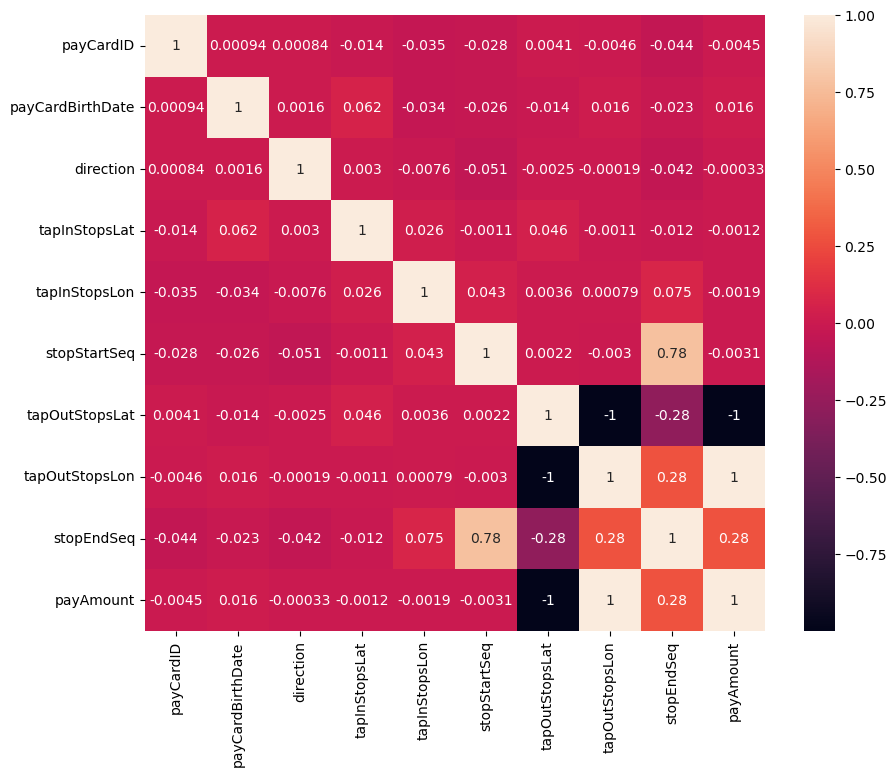

In [37]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(numerik.corr(), annot=True)
plt.show()

### **Kesimpulan Korelasi Berdasarkan Heatmap**

1. **Hubungan antar titik naik dan turun:**
   - Kolom `stopStartSeq` dan `stopEndSeq` menunjukkan **korelasi yang kuat** (**r = 0.78**) → artinya, urutan pemberhentian naik dan turun penumpang cenderung mengikuti pola linier (penumpang cenderung turun beberapa halte setelah naik).
   - `stopEndSeq` juga memiliki korelasi cukup kuat dengan `tapOutStopsLat`, `tapOutStopsLon`, dan `payAmount`, menandakan bahwa **jauh-dekatnya perjalanan berkaitan dengan besarnya pembayaran (`payAmount`)**.

2. **`payAmount` hanya berkorelasi lemah dengan sebagian besar fitur:**
   - Korelasi paling tinggi terjadi dengan `stopEndSeq` dan `tapOutStopsLon` (**r = 0.28**).
   - Sisanya, seperti `tapInStopsLat`, `tapInStopsLon`, `direction`, `payCardID`, dan lainnya, memiliki korelasi yang sangat lemah hingga nyaris nol terhadap `payAmount`.

3. **`payCardID` dan `payCardBirthDate` tidak memiliki korelasi kuat dengan fitur lainnya:**
   - Nilai korelasinya sangat mendekati nol, menandakan bahwa **identitas pengguna tidak banyak menjelaskan variasi dalam pola perjalanan maupun pembayaran**.

4. **Titik lokasi tap in dan tap out secara geospasial saling berlawanan:**
   - `tapOutStopsLat` berkorelasi **negatif sempurna (-1)** dengan `tapOutStopsLon` dan `tapInStopsLat`, yang menunjukkan kemungkinan penggunaan **satu jalur lurus yang berbeda arah secara konsisten** (misal koridor linear Ciledug–Tendean).

---

### **Kesimpulan Umum (Disesuaikan dengan Judul Penelitian)**
> Berdasarkan analisis korelasi, dapat disimpulkan bahwa **pola perjalanan penumpang Transjakarta** memiliki hubungan yang cukup kuat antara titik naik dan titik turun (ditunjukkan oleh korelasi antara `stopStartSeq` dan `stopEndSeq`). Namun, besarnya pembayaran (`payAmount`) hanya menunjukkan hubungan lemah terhadap atribut lainnya, termasuk lokasi naik dan turun maupun arah perjalanan. Hal ini mengindikasikan bahwa **jumlah pembayaran tidak sepenuhnya mencerminkan panjang perjalanan atau karakteristik pengguna**, melainkan kemungkinan dipengaruhi oleh sistem tarif tetap.

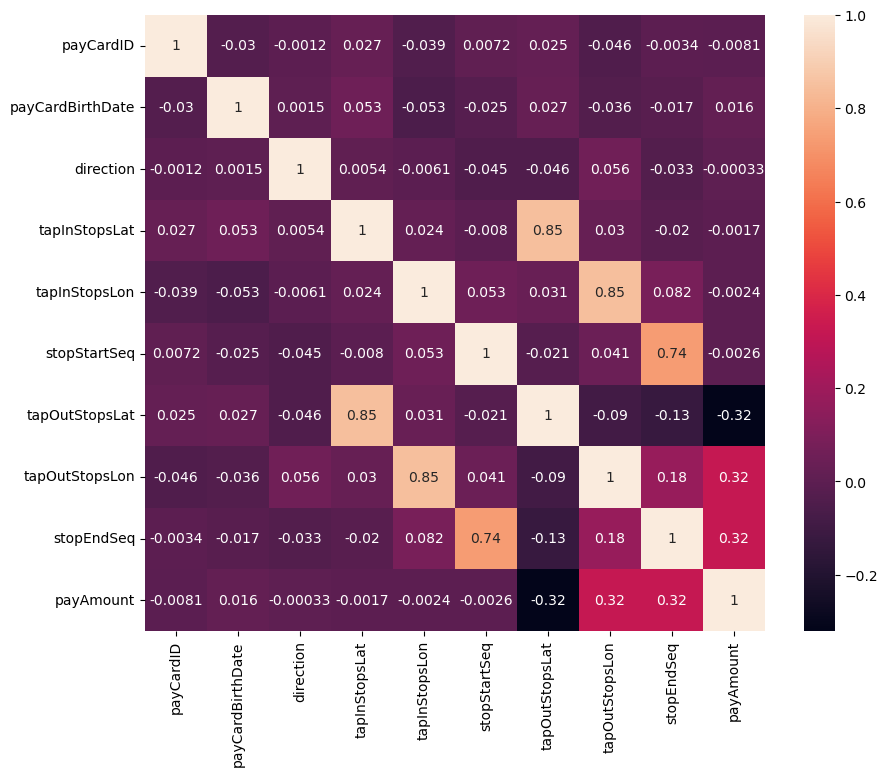

In [38]:
# data dengan distribusi tidak normal
plt.figure(figsize=(10, 8)) 
sns.heatmap(numerik.corr(method='spearman'), annot=True) # defaultnya pearson
plt.show()

### **Kesimpulan Heatmap Korelasi Variabel Transjakarta**

1. **Korelasi Sangat Kuat antar Koordinat Lokasi Naik dan Turun**
   - `tapInStopsLat` dan `tapOutStopsLat`: **r = 0.85**
   - `tapInStopsLon` dan `tapOutStopsLon`: **r = 0.85**
   Artinya, lokasi naik dan turun penumpang berada dalam lintasan yang hampir sama, menunjukkan **konsistensi rute perjalanan penumpang**.

2. **Korelasi Kuat antara Urutan Halte**
   - `stopStartSeq` dan `stopEndSeq`: **r = 0.74**
   Penumpang cenderung turun beberapa halte setelah tempat naik, mengindikasikan **perjalanan linier** di koridor.

3. **Hubungan Moderat dengan Jumlah Pembayaran (`payAmount`)**
   - `payAmount` berkorelasi:
     - **Positif** dengan `tapOutStopsLon`, `stopEndSeq`: **r = 0.32**
     - **Negatif** dengan `tapOutStopsLat`: **r = -0.32**
   Makin jauh lokasi atau makin tinggi urutan halte turun, cenderung berbayar lebih mahal. Artinya, **tarif memiliki asosiasi moderat dengan panjang atau arah perjalanan**.

4. **Variabel Identitas dan Arah Tidak Berkorelasi Signifikan**
   - Seperti `payCardID`, `payCardBirthDate`, dan `direction`, memiliki korelasi sangat rendah (mendekati 0) terhadap variabel lain.
   Menunjukkan bahwa **identitas pengguna dan arah perjalanan tidak berpengaruh langsung terhadap pola rute atau pembayaran**.

---

### Interpretasi Keseluruhan:

> Heatmap menunjukkan bahwa **lokasi naik/turun** dan **urutan halte** sangat berkorelasi, mencerminkan struktur linier rute Transjakarta. **Pembayaran** cenderung meningkat seiring **panjang perjalanan**, sementara **faktor personal pengguna tidak menunjukkan hubungan berarti** terhadap pola perjalanan.

# Uji Statistika Inferensial

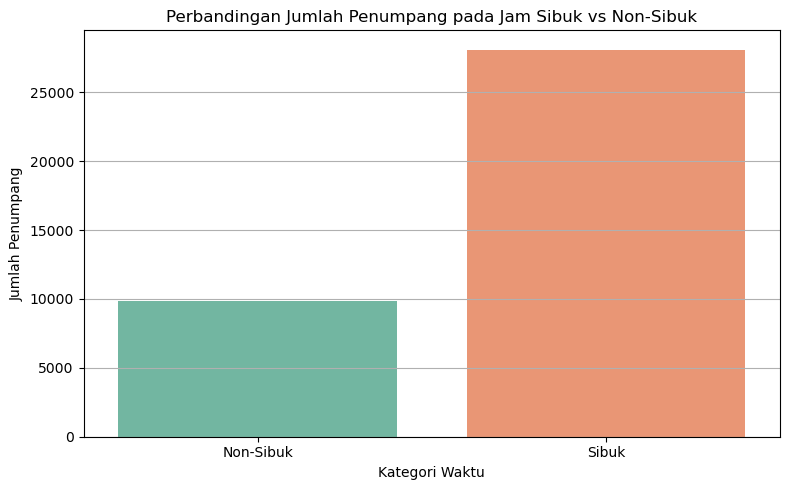

In [81]:
# Distribusi Perbedaan jumlah penumpang pada jam sibuk vs non-sibuk

# Menentukan jam sibuk (pagi 06:00-09:00 & sore 16:00-19:00)
jam_sibuk = tj[(tj['tapInTime'].dt.hour.between(6, 9)) |
                      (tj['tapInTime'].dt.hour.between(16, 19))]

# Menentukan jam non-sibuk (di luar jam sibuk)
jam_non_sibuk = tj[~tj.index.isin(jam_sibuk.index)]

# Menambahkan kolom kategori waktu (default: Non-Sibuk)
tj['kategori_waktu'] = 'Non-Sibuk'
tj.loc[jam_sibuk.index, 'kategori_waktu'] = 'Sibuk'

# Hitung jumlah penumpang per kategori waktu
jumlah_penumpang = tj.groupby('kategori_waktu').size().reset_index(name='jumlah_penumpang')

# Plot bar chart jumlah penumpang
plt.figure(figsize=(8, 5))
sns.barplot(x='kategori_waktu', y='jumlah_penumpang', hue='kategori_waktu', data=jumlah_penumpang, palette='Set2', legend=False)
plt.title('Perbandingan Jumlah Penumpang pada Jam Sibuk vs Non-Sibuk')
plt.xlabel('Kategori Waktu')
plt.ylabel('Jumlah Penumpang')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [76]:
# Uji Mann-Whitney U: Menguji apakah jumlah penumpang berbeda signifikan antara jam sibuk dan non-sibuk.

from scipy.stats import mannwhitneyu

H0 = 'Tidak ada perbedaan jumlah penumpang antara jam sibuk dan non-sibuk'
Ha = 'Terdapat perbedaan jumlah penumpang antara jam sibuk dan non-sibuk'

sampel1 = jam_sibuk['payAmount']
sampel2 = jam_non_sibuk['payAmount']

stat, pval = mannwhitneyu(sampel1, sampel2, alternative='two-sided')

print('p-value:', pval)
print('t score:', stat)

p-value: 0.04870032996825522
t score: 137247070.0


In [77]:
if pval < 0.05:
    print(f'Tolak H0: {Ha}')
else:
    print(f'Terima H0: {H0}')

Tolak H0: Terdapat perbedaan jumlah penumpang antara jam sibuk dan non-sibuk


In [45]:
if pval < 0.05:
    print(f'Ada cukup bukti untuk menolak H0')
else:
    print(f'Tidak ada cukup bukti untuk menolak H0')

Ada cukup bukti untuk menolak H0


### **Penjelasan Uji Mann-Whitney U 1**

#### **Tujuan Uji**
Untuk mengetahui apakah **jumlah penumpang (dilihat dari `payAmount`) berbeda secara signifikan antara jam sibuk dan non-sibuk**.

---

### **Jenis Uji: Mann-Whitney U Test**

#### Mengapa pakai *Mann-Whitney U*?
Karena:
1. **Data tidak diasumsikan berdistribusi normal** (non-parametrik).
2. Ingin membandingkan **dua kelompok independen**:
   - `jam_sibuk['payAmount']`
   - `jam_non_sibuk['payAmount']`
3. Data `payAmount` kemungkinan bersifat **ordinal atau tidak normal**, sehingga **uji t tidak cocok**.

---

### **Hipotesis Statistik**
- **H₀ (Hipotesis nol)**: Tidak ada perbedaan jumlah penumpang antara jam sibuk dan non-sibuk.
- **Hₐ (Hipotesis alternatif)**: Terdapat perbedaan jumlah penumpang antara jam sibuk dan non-sibuk.

---

### **Hasil Uji**
- `p-value = 0.0487`
- Karena `p-value < 0.05`, maka:
  - **Terima Hₐ**

---

### **Kesimpulan**
> Terdapat **perbedaan yang signifikan** dalam jumlah penumpang antara jam sibuk dan non-sibuk. Artinya, pola perjalanan penumpang **berbeda secara nyata** tergantung waktu (sibuk vs tidak sibuk).

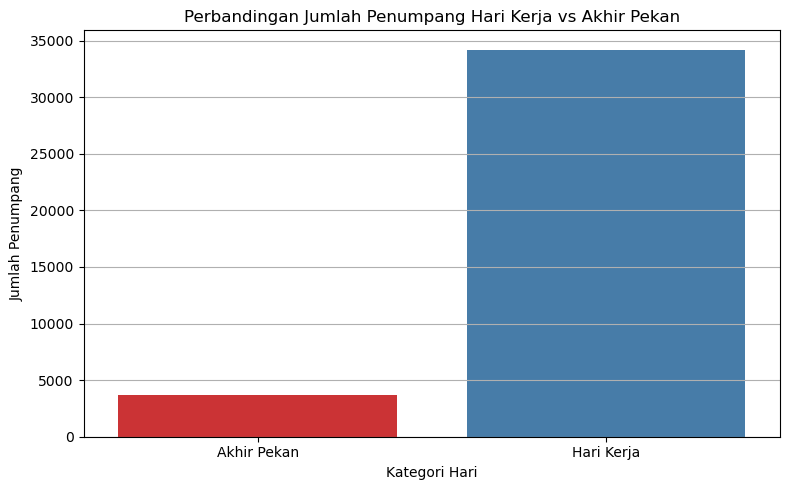

In [82]:
# Uji Perbedaan Jumlah Penumpang Hari Kerja vs Akhir Pekan

# Menentukan hari kerja (Senin-Jumat) dan akhir pekan (Sabtu-Minggu)
tj["day_of_week"] = tj["tapInTime"].dt.weekday
hari_kerja = tj[tj["day_of_week"] < 5]  # Senin (0) - Jumat (4)
akhir_pekan = tj[tj["day_of_week"] >= 5]  # Sabtu (5) - Minggu (6)

# Tambahkan kolom kategori hari
tj['kategori_hari'] = 'Hari Kerja'
tj.loc[akhir_pekan.index, 'kategori_hari'] = 'Akhir Pekan'

# Hitung jumlah penumpang per kategori hari (untuk visualisasi)
jumlah_penumpang_hari = tj.groupby('kategori_hari').size().reset_index(name='jumlah_penumpang')

# Visualisasi perbedaan jumlah penumpang
plt.figure(figsize=(8, 5))
sns.barplot(x='kategori_hari', y='jumlah_penumpang', hue = 'kategori_hari', data=jumlah_penumpang_hari, palette='Set1')
plt.title('Perbandingan Jumlah Penumpang Hari Kerja vs Akhir Pekan')
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Penumpang')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [78]:
# Hitung jumlah penumpang per hari
penumpang_kerja_per_hari = hari_kerja.groupby(hari_kerja["tapInTime"].dt.date).size()
penumpang_pekan_per_hari = akhir_pekan.groupby(akhir_pekan["tapInTime"].dt.date).size()

# Uji Mann-Whitney U: apakah terdapat perbedaan signifikan
H0 = 'Tidak ada perbedaan jumlah penumpang antara hari kerja dan akhir pekan'
Ha = 'Terdapat perbedaan jumlah penumpang antara hari kerja dan akhir pekan'

stat, pval = mannwhitneyu(penumpang_kerja_per_hari, penumpang_pekan_per_hari, alternative='two-sided')

print('p-value:', pval)
print('U statistic:', stat)

p-value: 1.148258436567313e-05
U statistic: 200.0


In [79]:
if pval < 0.05:
    print(f'Tolak H0: {Ha}')
else:
    print(f'Terima H0: {H0}')

Tolak H0: Terdapat perbedaan jumlah penumpang antara hari kerja dan akhir pekan


In [80]:
if pval < 0.05:
    print(f'Ada cukup bukti untuk menolak H0')
else:
    print(f'Tidak ada cukup bukti untuk menolak H0')

Ada cukup bukti untuk menolak H0


### **Penjelasan Uji Mann-Whitney U 2**

#### **Tujuan Uji**
Untuk mengetahui apakah **jumlah penumpang per hari** berbeda secara signifikan antara **hari kerja dan akhir pekan**.

---

### **Jenis Uji: Mann-Whitney U Test**

#### Mengapa pakai *Mann-Whitney U*?
Karena:
1. **Data tidak diasumsikan berdistribusi normal** (non-parametrik).
2. Ingin membandingkan **dua kelompok independen**:
   - Jumlah penumpang per hari pada hari kerja (`penumpang_kerja_per_hari`)
   - Jumlah penumpang per hari pada akhir pekan (`penumpang_pekan_per_hari`)
3. Jumlah penumpang per hari kemungkinan **tidak homogen** atau **skewed**, jadi uji non-parametrik lebih tepat dibanding uji t.

---

### **Hipotesis Statistik**
- **H₀ (Hipotesis nol)**: Tidak ada perbedaan jumlah penumpang antara hari kerja dan akhir pekan.
- **Hₐ (Hipotesis alternatif)**: Terdapat perbedaan jumlah penumpang antara hari kerja dan akhir pekan.

---

### **Hasil Uji**
- `p-value = 1.148×10⁻⁵` → jauh lebih kecil dari 0.05.
- Maka:
  - **Terima Hₐ**

---

### **Kesimpulan**
> Terdapat **perbedaan yang signifikan** dalam jumlah penumpang per hari antara hari kerja dan akhir pekan. Artinya, pola penggunaan Transjakarta **berubah tergantung hari**, dengan perilaku perjalanan penumpang yang berbeda antara weekday dan weekend.